In [1]:
import matplotlib.pyplot as plt
from config import settings

import pymongo
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['font.size'] = 25

# db = pymongo.MongoClient("mongodb://localhost:27017/")['Jan16_cloudseg_saliency_loss']
db = pymongo.MongoClient("mongodb://localhost:27017/")['Feb26_encoding_limit_compute_highergt']

In [5]:


import numpy as np
# fmts = [f'videos/yoda/dashcam_{i}/part%d.mp4' for i in [1,2,3,4,5,6,7,8]]
fmts = [f'videos/driving/driving_{i}/part%d.mp4' for i in [0,1,2,3,4]]

In [6]:
def calc_cost_chameleon(approach, fmt, cost_key='compute'):
    
    costs = []

    try:

        for sec in range(0, 1000):


            query = {
                'second': sec,
                'command_line_args.approach': approach,
                'command_line_args.input': fmt,
            }

            x = list(db['cost'].find(query))
            x = sorted(x, key = lambda x: x['_id'])
            costs.append(x[-1])

    except IndexError:
        pass
    print(len(costs))
    return [i[cost_key] for i in costs]

def calc_cost_backprop(approach, fmt, cost_key='compute'):
    
    costs = []

    try:

        for sec in range(0, 1000):

            
            query = {
                'second': sec,
                'command_line_args.approach': approach,
                'command_line_args.input': fmt,
            }

            x = list(db['stats'].find(query))
            x = sorted(x, key = lambda x: x['_id'])
            costs.append(x[-1])
            
            if sec % 3 == 0 and sec < 20:
                costs[-1]['compute'] = len(costs[-1]['encoded_frames']) / 10 + 0.1
            else:
                costs[-1]['compute'] = len(costs[-1]['encoded_frames']) / 10

    except IndexError:
        pass
    print(len(costs))
    return [i[cost_key] for i in costs]

178
178
178
backprop_encoding_SGD_bwweight_0.1_lr0.5: 0.15930343993549576, 0.8770671454624513
178
178
178
backprop_encoding_SGD_bwweight_0.05_lr0.5: 0.23723418461053034, 0.9166528805253211
178
178
178
backprop_encoding_SGD_bwweight_0.03_lr0.5: 0.3303431573504512, 0.9449908212664422
178
178
178
chameleon_4x_bwweight_0.1: 0.4143093088883036, 0.9244692275781979
178
178
178
chameleon_top3_bwweight_0.8: 0.3087607241394595, 0.8096068136477739
178
178
178
chameleon_top3_bwweight_0.4: 0.3087607241394595, 0.8096068136477739
178
178
178
chameleon_top3_bwweight_0.2: 0.349473569157715, 0.8426425870549813
178
178
178
chameleon_top3_bwweight_0.1: 0.349473569157715, 0.8426425870549813
178
178
178
chameleon_top3_bwweight_0.05: 0.3583265409764346, 0.8593683803684256


Text(0, 0.5, 'F1')

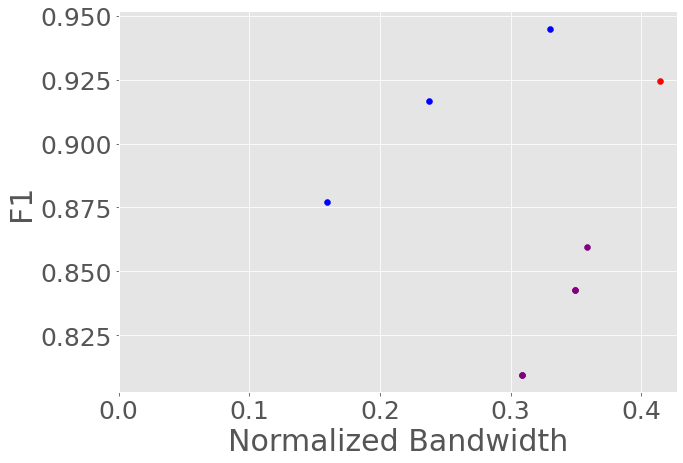

In [7]:
def plot_approach(ax, approach, video_name, label, c):
    
    if 'chameleon' in approach:
        
        compute = calc_cost_chameleon(approach, video_name)
        bw = calc_cost_chameleon(approach, video_name, cost_key = 'norm_bw')
        acc = calc_cost_chameleon(approach, video_name, cost_key='f1')
        
    else:
        
        compute = calc_cost_backprop(approach, video_name)
        bw = calc_cost_backprop(approach, video_name, cost_key = 'norm_bw')
        acc = calc_cost_backprop(approach, video_name, cost_key='f1')
        
    # ax.plot(range(len(bw)), [0.5*i + (1-j) for i, j in zip(bw, acc)], label=label, color=c)
    # print(f'{approach}: {np.mean([0.5*i + (1-j) for i, j in zip(bw, acc)])}')
    ax.scatter([np.mean(bw)], [np.mean(acc)], color=c, label=label)
    print(f'{approach}: {np.mean(bw)}, {np.mean(acc)}')

fig, ax = plt.subplots(figsize=(10, 7))

loss_type = 'saliency_error'
downsample_factor=4

fmt = fmts[4]

# for bw_weight in [0.3, 0.25, 0.2, 0.1, 0.07, 0.06, 0.05, 0.04, 0.03]:
for bw_weight in [ 0.1, 0.05, 0.03]:

    plot_approach(ax,f'backprop_encoding_SGD_bwweight_{bw_weight}_lr0.5', fmt, f'Backprop_{bw_weight}', c='blue')
    
# for bw_weight in [0.3, 0.1]:
    
#     plot_approach(ax, f'backprop_sigmoid_{loss_type}_encoding_Adam_bwweight_{bw_weight}', fmts[0], f'Backprop_{bw_weight}', c='green')



# for bw_weight in [0.07, 0.06, 0.05, 0.04, 0.03]:
for bw_weight in [ 0.1]:    
    # name = f'chameleon_downsample_rerun_{downsample_factor}_bwweight_{bw_weight}'
    
    name = f'chameleon_{downsample_factor}x_bwweight_{bw_weight}'

    plot_approach(ax, name, fmt, f'Grid_{bw_weight}', c='red')
    
    
for bw_weight in [0.8, 0.4, 0.2, 0.1, 0.05]:    
    # name = f'chameleon_downsample_rerun_{downsample_factor}_bwweight_{bw_weight}'
    
    name = f'chameleon_top3_bwweight_{bw_weight}'

    plot_approach(ax, name, fmt, f'Grid_{bw_weight}', c='purple')


ax.set_xlim(left=0)
ax.set_xlabel('Normalized Bandwidth')
ax.set_ylabel('F1')


89
89
89
backprop_encoding_SGD_bwweight_0.05_lr0.5: 0.3723975675061618
89
89
89
chameleon_4x_bwweight_0.1: 0.4961611872691925


Text(0, 0.5, 'F1')

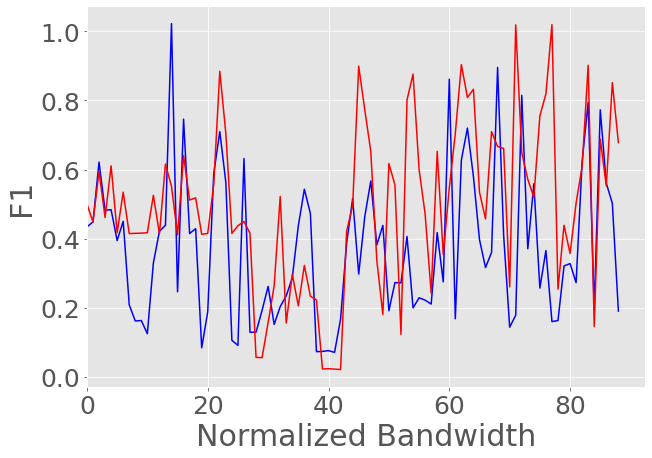

In [16]:
def plot_approach(ax, approach, video_name, label, c):
    
    if 'chameleon' in approach:
        
        compute = calc_cost_chameleon(approach, video_name)
        bw = calc_cost_chameleon(approach, video_name, cost_key = 'norm_bw')
        acc = calc_cost_chameleon(approach, video_name, cost_key='f1')
        
    else:
        
        compute = calc_cost_backprop(approach, video_name)
        bw = calc_cost_backprop(approach, video_name, cost_key = 'norm_bw')
        acc = calc_cost_backprop(approach, video_name, cost_key='f1')
        
    ax.plot(range(len(bw)), [0.5*i + (1-j) for i, j in zip(bw, acc)], label=label, color=c)
    print(f'{approach}: {np.mean([0.5*i + (1-j) for i, j in zip(bw, acc)])}')
    # ax.scatter([np.mean(bw)], [np.mean(acc)], color=c, label=label)
    # print(f'{approach}: {np.mean(bw)}, {np.mean(acc)}')

fig, ax = plt.subplots(figsize=(10, 7))

loss_type = 'saliency_error'
downsample_factor=4

fmt = fmts[0]

# for bw_weight in [0.3, 0.25, 0.2, 0.1, 0.07, 0.06, 0.05, 0.04, 0.03]:
for bw_weight in [ 0.05]:

    plot_approach(ax,f'backprop_encoding_SGD_bwweight_{bw_weight}_lr0.5', fmt, f'Backprop_{bw_weight}', c='blue')
    
# for bw_weight in [0.3, 0.1]:
    
#     plot_approach(ax, f'backprop_sigmoid_{loss_type}_encoding_Adam_bwweight_{bw_weight}', fmts[0], f'Backprop_{bw_weight}', c='green')



# for bw_weight in [0.07, 0.06, 0.05, 0.04, 0.03]:
for bw_weight in [0.1]:    
    # name = f'chameleon_downsample_rerun_{downsample_factor}_bwweight_{bw_weight}'
    
    name = f'chameleon_{downsample_factor}x_bwweight_{bw_weight}'

    plot_approach(ax, name, fmt, f'Grid_{bw_weight}', c='red')
    
    
# for bw_weight in [0.2,0.1,0.05]:    
#     # name = f'chameleon_downsample_rerun_{downsample_factor}_bwweight_{bw_weight}'
    
#     name = f'chameleon_top3_bwweight_{bw_weight}'

#     plot_approach(ax, name, fmt, f'Grid_{bw_weight}', c='purple')


ax.set_xlim(left=0)
ax.set_xlabel('Normalized Bandwidth')
ax.set_ylabel('F1')